In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import math
from sklearn import metrics


import statsmodels.api as sm
%precision 3

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


'%.3f'

Text(0.5, 1.0, 'Logistic Function')

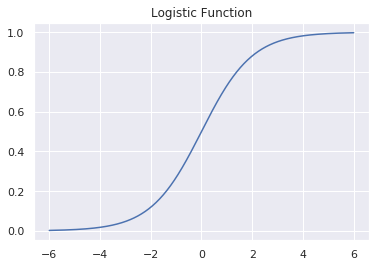

In [4]:
def logistic(t):
    return 1.0 / (1 + math.exp(-1.0*t))

t = np.linspace(-6, 6, 500)

y = np.array([logistic(ele) for ele in t])

plt.plot(t, y)
plt.title("Logistic Function")

In [5]:
adultery = sm.datasets.fair.load_pandas().data

In [6]:
adultery.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

adultery["Had_Affair"] = adultery['affairs'].apply(affair_check)

In [8]:
adultery.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [11]:
adultery.groupby("Had_Affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


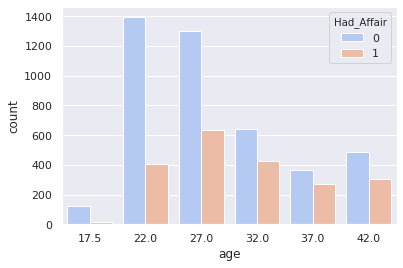

In [14]:
sns.countplot('age', data = adultery, hue = "Had_Affair", palette = "coolwarm")

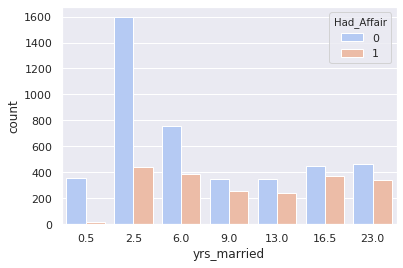

In [15]:
sns.countplot('yrs_married', data = adultery, hue = "Had_Affair", palette = "coolwarm")

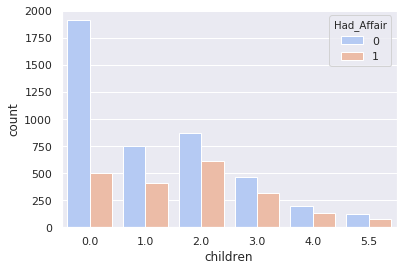

In [16]:
sns.countplot('children', data = adultery, hue = "Had_Affair", palette = "coolwarm")

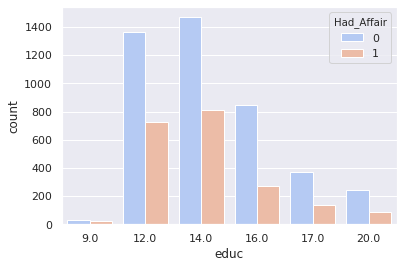

In [17]:
sns.countplot('educ', data = adultery, hue = "Had_Affair", palette = "coolwarm")

In [19]:
occ_dummies = pd.get_dummies(adultery["occupation"])
hus_occ_dummies = pd.get_dummies(adultery["occupation_husb"])

occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [24]:
occ_dummies.columns = ['occ1', 'occ2','occ3', 'occ4', 'occ5', 'occ6']
hus_occ_dummies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6', ]

In [25]:
X = adultery.drop(["occupation", "occupation_husb", "Had_Affair"], axis=1)

In [26]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [27]:
X = pd.concat([X, dummies], axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [29]:
Y = adultery.Had_Affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [30]:
X = X.drop('occ1', axis=1)
X = X.drop('hocc1', axis=1)

X = X.drop('affairs', axis=1)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [31]:
Y = Y.values

Y

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
log_model = LogisticRegression()

log_model.fit(X,Y)
log_model.score(X,Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [34]:
Y.mean()

0.3224945020420987

In [36]:
coeff_df = pd.DataFrame([X.columns, log_model.coef_[0]]).T

In [37]:
coeff_df

,0,1
0,rate_marriage,-0.697924
1,age,-0.0563646
2,yrs_married,0.103919
3,children,0.0181622
4,religious,-0.368518
5,educ,0.00875505
6,occ2,0.298052
7,occ3,0.607993
8,occ4,0.346222
9,occ5,0.942505


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
log_model2 = LogisticRegression()

log_model2.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
class_predict = log_model2.predict(X_test)
print(metrics.accuracy_score(Y_test, class_predict))

0.7198492462311558
